In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv('C:/Python/00_project/01_nalssi_con/contest_raw_data/smart_farm.csv')

In [42]:
# 날짜 제외
df.rename({'Unnamed: 0' : 'index'}, axis = 1, inplace = True)
df.columns

Index(['index', 'smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd',
       'smart_farm.hh', 'smart_farm.nn', 'smart_farm.insolation',
       'smart_farm.out_tmperature', 'smart_farm.out_humidity',
       'smart_farm.wind_speed', 'smart_farm.wind_direction',
       'smart_farm.in_tmperature', 'smart_farm.in_humidity',
       'smart_farm.shield_light_h', 'smart_farm.shield_tmperature_h',
       'smart_farm.shield_energy_h', 'smart_farm.shield_energy_v',
       'smart_farm.exhaust_fan', 'smart_farm.ceiling',
       'smart_farm.floating_fan', 'smart_farm.fan_coil_b_site',
       'smart_farm.ventilation_temperature_control',
       'smart_farm.heating_temperature_set_up', 'smart_farm.heat_supply'],
      dtype='object')

In [43]:
df = df.set_index('index', drop = True)
df = df.iloc[:,5:]
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132480 entries, 1 to 132480
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   smart_farm.insolation                       132480 non-null  float64
 1   smart_farm.out_tmperature                   132480 non-null  float64
 2   smart_farm.out_humidity                     132480 non-null  int64  
 3   smart_farm.wind_speed                       132480 non-null  float64
 4   smart_farm.wind_direction                   132480 non-null  int64  
 5   smart_farm.in_tmperature                    131968 non-null  float64
 6   smart_farm.in_humidity                      131968 non-null  float64
 7   smart_farm.shield_light_h                   131968 non-null  float64
 8   smart_farm.shield_tmperature_h              131968 non-null  float64
 9   smart_farm.shield_energy_h                  131968 non-null  float64
 

132480

In [ ]:
# NULL 처리
def fillna(df):
    # 연속형 변수 결측치 처리
    df['smart_farm.in_tmperature'].fillna(df['smart_farm.in_tmperature'].mean(), inplace=True)
    df['smart_farm.in_humidity'].fillna(df['smart_farm.in_humidity'].mean(), inplace=True)
    df['smart_farm.shield_light_h'].fillna(df['smart_farm.shield_light_h'].mean(), inplace=True)
    df['smart_farm.shield_tmperature_h'].fillna(df['smart_farm.shield_tmperature_h'].mean(), inplace=True)
    df['smart_farm.shield_energy_h'].fillna(df['smart_farm.shield_energy_h'].mean(), inplace=True)
    df['smart_farm.shield_energy_v'].fillna(df['smart_farm.shield_energy_v'].mean(), inplace=True)
    df['smart_farm.ceiling'].fillna(df['smart_farm.ceiling'].mean(), inplace=True)
    df['smart_farm.ventilation_temperature_control'].fillna(df['smart_farm.ventilation_temperature_control'].mean(), inplace=True)
    df['smart_farm.heating_temperature_set_up'].fillna(df['smart_farm.heating_temperature_set_up'].mean(), inplace=True)
    df['smart_farm.heat_supply'].fillna(df['smart_farm.heat_supply'].mean(), inplace=True)
    # 범주형 변수 결측치 처리
    df['smart_farm.exhaust_fan'].fillna(0, inplace=True)
    df['smart_farm.floating_fan'].fillna(0, inplace=True)
    df['smart_farm.fan_coil_b_site'].fillna(0, inplace=True)
    return df
fillna(df)
df.isnull().sum()

In [8]:
scaler = StandardScaler()

In [9]:
scaler_df = scaler.fit_transform(df)

In [10]:
scaler_df

array([[-1.73203773, -1.33711585,  1.16175934, ..., -0.33077372,
        -0.42686649,  1.70488102],
       [-1.73201159, -1.33711585,  1.16175934, ..., -0.33077372,
        -0.42686649,  1.70488102],
       [-1.73198544, -1.33711585,  1.16175934, ..., -0.33077372,
        -0.42686649,  1.70488102],
       ...,
       [ 1.73198544,  0.74787836, -0.63962031, ..., -0.33077372,
        -0.42686649,  1.39253043],
       [ 1.73201159,  0.74787836, -0.63962031, ..., -0.33077372,
        -0.42686649,  1.39253043],
       [ 1.73203773,  0.74787836, -0.63962031, ..., -0.33077372,
        -0.42686649,  1.39253043]])

In [11]:
# array를 dataframe으로 변경
scaled_df = pd.DataFrame(scaler_df, columns = df.columns)

In [12]:
scaled_df

,Unnamed: 0,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,-1.732038,-1.337116,1.161759,1.116316,-1.661325,-1.703420,-0.652191,0.640780,0.741092,-0.842148,...,-0.851157,-0.603343,-0.691607,-0.285748,-0.274647,0.199021,-1.381513,-0.330774,-0.426866,1.704881
1,-1.732012,-1.337116,1.161759,1.116316,-1.661325,-1.645677,-0.653113,0.640780,0.741092,-0.583259,...,-0.851157,-0.603343,-0.691607,-0.285748,-0.274647,0.199021,-1.381513,-0.330774,-0.426866,1.704881
2,-1.731985,-1.337116,1.161759,1.116316,-1.661325,-1.587934,-0.653574,0.621367,0.741092,-0.259647,...,-0.851157,-0.603343,-0.691607,-0.285748,-0.274647,0.199021,0.723844,-0.330774,-0.426866,1.704881
3,-1.731959,-1.337116,1.161759,1.116316,-1.661325,-1.530191,-0.653574,0.621367,0.741092,-0.000758,...,-0.851157,-0.603343,-0.691607,-0.285748,-0.274647,0.199021,0.723844,-0.330774,-0.426866,1.392530
4,-1.731933,-1.337116,1.161759,1.116316,-1.661325,-1.472448,-0.652652,0.621367,0.741092,-0.259647,...,-0.851157,-0.603343,-0.691607,-0.285748,-0.274647,0.199021,0.723844,-0.330774,-0.426866,2.017232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132475,1.731933,0.747878,-0.639620,1.338853,1.661325,1.472448,-0.652191,0.310760,-0.048698,-0.842148,...,-0.851157,-0.603343,-0.691607,-0.285748,-0.274647,0.199021,0.723844,-0.330774,-0.426866,1.704881
132476,1.731959,0.747878,-0.639620,1.338853,1.661325,1.530191,-0.652191,0.310760,0.000664,-0.583259,...,-0.851157,-0.603343,-0.691607,-0.285748,-0.274647,0.199021,0.723844,-0.330774,-0.426866,1.392530
132477,1.731985,0.747878,-0.639620,1.338853,1.661325,1.587934,-0.652191,0.310760,0.000664,-0.583259,...,-0.851157,-0.603343,-0.691607,-0.285748,-0.274647,0.199021,0.723844,-0.330774,-0.426866,1.392530
132478,1.732012,0.747878,-0.639620,1.338853,1.661325,1.645677,-0.651730,0.310760,0.000664,-0.583259,...,-0.851157,-0.603343,-0.691607,-0.285748,-0.274647,0.199021,0.723844,-0.330774,-0.426866,1.392530


# raw와 정규화 데이터 차트 비교

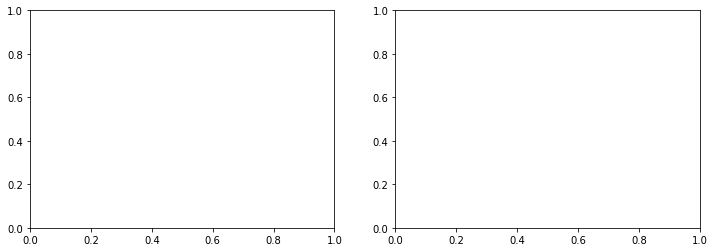

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

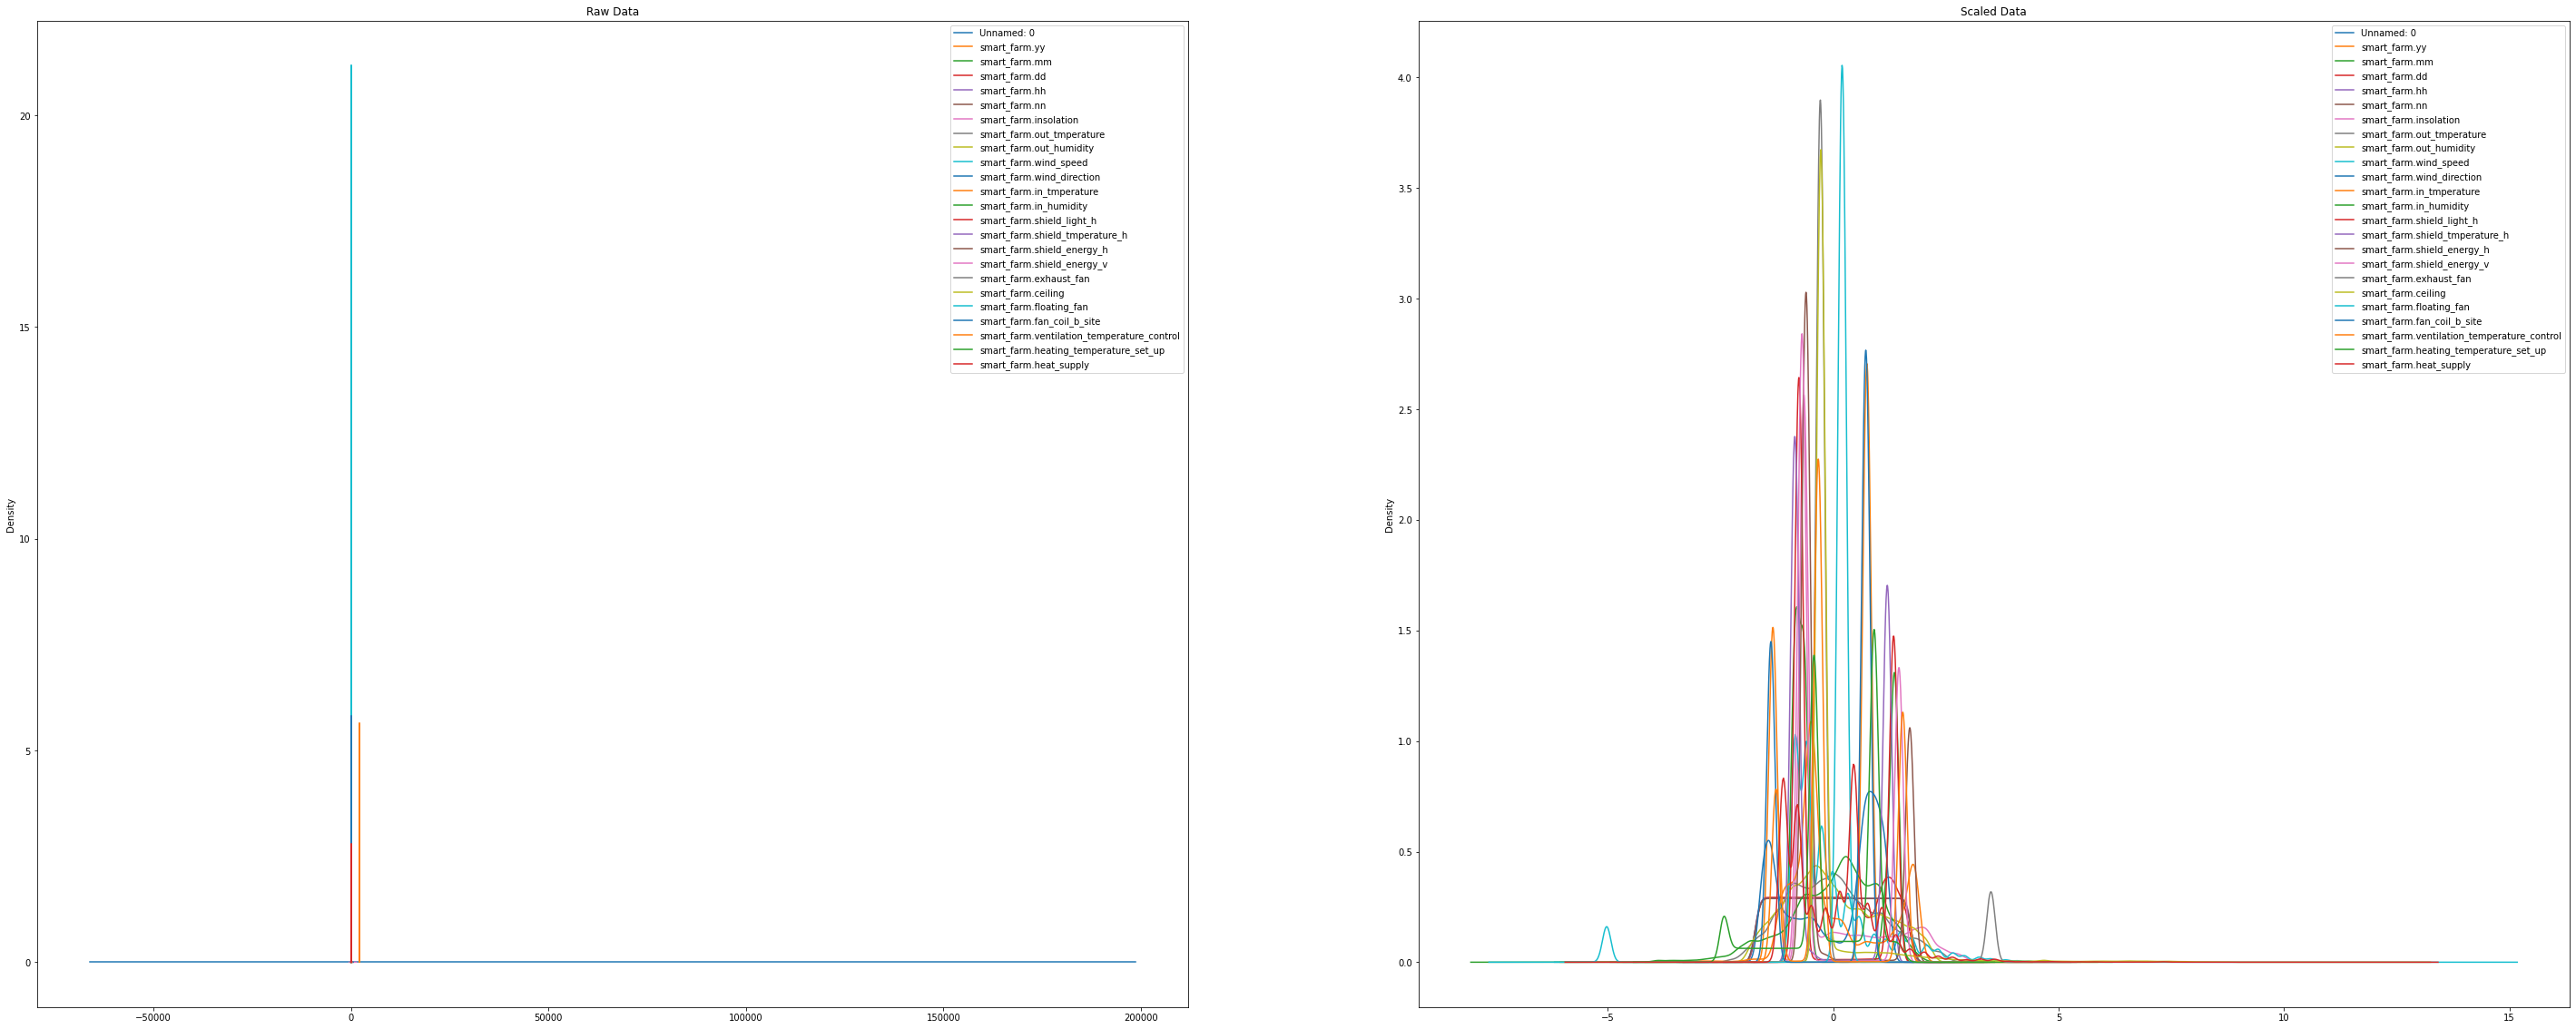

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(50, 20))
df.plot(kind = 'kde', title = 'Raw Data', ax = ax[0])
scaled_df.plot(kind = 'kde', title = 'Scaled Data', ax = ax[1])
plt.show()

# raw data boxplot

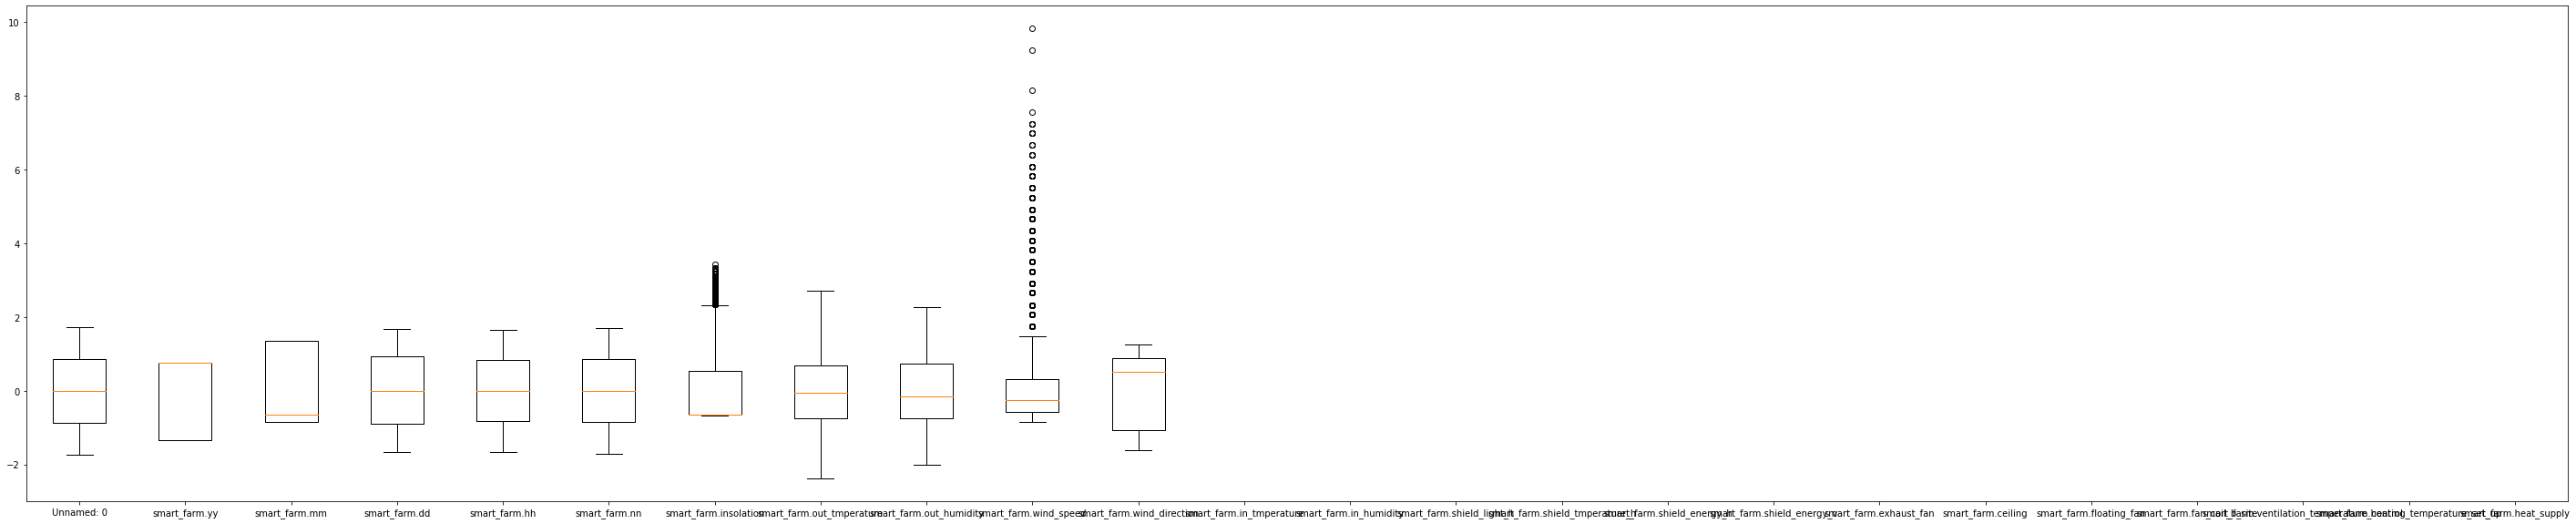

In [24]:
# 각 분류기별 결과를 Box 그래프로 출력합니다.
fig = plt.figure(figsize=(50,10))
ax = fig.add_subplot(111)
ax.boxplot(scaled_df)
ax.set_xticklabels(df.columns)
plt.show()

# 이상값 분석(Z-Score)

In [25]:
import numpy as np

In [54]:
len(df.columns)

18

In [70]:
threshold = 3
for i in range(len(df.columns)):
    data = df.iloc[:,i]
    data_name = df.columns[i]
    mean = np.mean(data)
    std = np.std(data)
    print(data_name, '의 평균:{:.2f}'.format(mean))
    print( data_name, '의 표준 편차:{:.2f}'.format(std))
    outlier[i] = []
    
    for j in data: 
        z = (j - mean)/std 
        if z > threshold: 
            outlier[i].append(j) 
#     print('데이터셋 내의 이상값은', outlier[i])
    print('이상값은 총', len(outlier[i]), '개')
    print('-'*70)

smart_farm.insolation 의 평균:138.80
smart_farm.insolation 의 표준 편차:216.97
이상값은 총 85 개
----------------------------------------------------------------------
smart_farm.out_tmperature 의 평균:2.50
smart_farm.out_tmperature 의 표준 편차:5.15
이상값은 총 0 개
----------------------------------------------------------------------
smart_farm.out_humidity 의 평균:51.99
smart_farm.out_humidity 의 표준 편차:20.26
이상값은 총 0 개
----------------------------------------------------------------------
smart_farm.wind_speed 의 평균:1.30
smart_farm.wind_speed 의 표준 편차:1.55
이상값은 총 2136 개
----------------------------------------------------------------------
smart_farm.wind_direction 의 평균:205.76
smart_farm.wind_direction 의 표준 편차:123.75
이상값은 총 0 개
----------------------------------------------------------------------
smart_farm.in_tmperature 의 평균:19.92
smart_farm.in_tmperature 의 표준 편차:3.98
이상값은 총 0 개
----------------------------------------------------------------------
smart_farm.in_humidity 의 평균:71.14
smart_farm.in_humidity 의 표준 편차:

In [ ]:
# 참고
## model 입출력 shape 확인(그림)
keras.utils.plot_model(model, show_shapes=True, dpi = 70)